## Problem Statement
+ This project understands how the student's performance (test scores) is affected by other variables such as `Gender`, `Ethnicity`, `Parental Level of Education`, `Lunch` and other features

## Data Collection 
+ Dataset source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
+ The data consist of 8 columns and 1000 rows.

### Import Data and Required Packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


### Read the data

In [3]:
# read the data
data_student = pd.read_csv('data/StudentsPerformance.csv')

# print the first few rows of the data
data_student.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# print the size of the data
print("size of the data is " + str(data_student.shape))

size of the data is (1000, 8)


## Data Cleaning
+ Check for missing data
+ check duplicate 
+ check data type
+ check number of unique values of each column
+ check statistics of each set
+ check category columns information

### Check for Missing Values
There are no missing vlaues

In [5]:
# check for missing values
data_student.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Check for duplicates
There are no duplicates

In [6]:
data_student.duplicated().sum()

0

### Check Data Types

In [7]:
# check for data types
data_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Check unique Values


In [8]:
# check the number unique values for each column
data_student.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Check statistics of data set


In [9]:
# check the summary statistics 
data_student.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
# replace the space with "_"
data_student.columns = data_student.columns.str.replace(' ', '_')
data_student.columns = data_student.columns.str.replace('/', '_')
data_student.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

## Data Exploration

In [14]:
print("Categories in 'gender' variable:   ", end = '')
print(data_student['gender'].unique())

print("Categories in 'race_etnnicity' variable:   ", end = '')
print(data_student['race_ethnicity'].unique())

print("Categories in 'Parental_Level_of_Education' variable:   ", end = '')
print(data_student['parental_level_of_education'].unique())

print("Categories in 'Lunch' variable:   ", end = '')
print(data_student['lunch'].unique())

print("Categories in 'Test_preparation_course' variable:   ", end = '')
print(data_student['test_preparation_course'].unique())

Categories in 'gender' variable:   ['female' 'male']
Categories in 'race_etnnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'Parental_Level_of_Education' variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'Lunch' variable:   ['standard' 'free/reduced']
Categories in 'Test_preparation_course' variable:   ['none' 'completed']


In [15]:
# Define numerical and categorical features
numerical_features = [feature for feature in data_student.columns if data_student[feature].dtype != 'O']
categorical_feature = [feature for feature in data_student.columns if data_student[feature].dtype == 'O']

# print columns
print("we have {} numeric columns: {}".format(len(numerical_features), numerical_features))
print("we have {} categorical columns: {}".format(len(categorical_feature), categorical_feature))

we have 3 numeric columns: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical columns: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding columns for Total Score and Average

In [16]:
data_student['total_score'] = data_student['math_score'] + data_student['reading_score'] + data_student['writing_score']
data_student['average'] = data_student['total_score']/3

data_student.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
# check the number of student that have full marks in each subject 
reading_full = data_student[data_student['reading_score'] == 100]['average'].count()
writing_full = data_student[data_student['writing_score'] == 100]['average'].count()
math_full = data_student[data_student['math_score'] == 100]['average'].count()

print(f'number of student that score 100 in reading are {reading_full}')
print(f'number of student that score 100 in writing are {writing_full}')
print(f'number of student that score 100 in math are {math_full}')

number of student that score 100 in reading are 17
number of student that score 100 in writing are 14
number of student that score 100 in math are 7


In [16]:
# check the number of student that have less tha 20 marks in each subject 
reading_less20 = data_student[data_student['reading score'] <= 20]['average'].count()
writing_less20 = data_student[data_student['writing score'] <= 20]['average'].count()
math_less20 = data_student[data_student['math score'] <= 20]['average'].count()

print(f'number of student that score 100 in reading are {reading_less20}')
print(f'number of student that score 100 in writing are {writing_less20}')
print(f'number of student that score 100 in math are {math_less20}')

number of student that score 100 in reading are 1
number of student that score 100 in writing are 3
number of student that score 100 in math are 4


## 4. Explanatory Analysis: Univariate Analysis


### 4.1 Visualize average score distribution

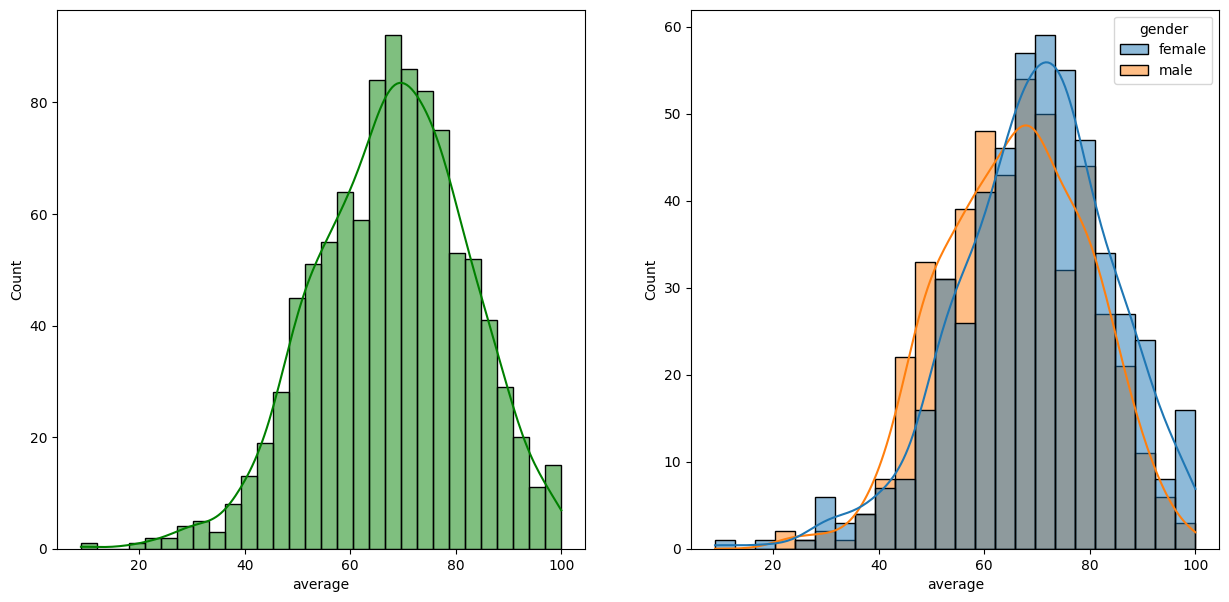

In [17]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(121)
sns.histplot(data = data_student, x = 'average', bins = 30,  kde=True, color = 'g')
plt.subplot(122)
sns.histplot(data = data_student, x = 'average', kde=True, hue = 'gender')
plt.show()

Insights
+ Female students tend to perform well then male students.

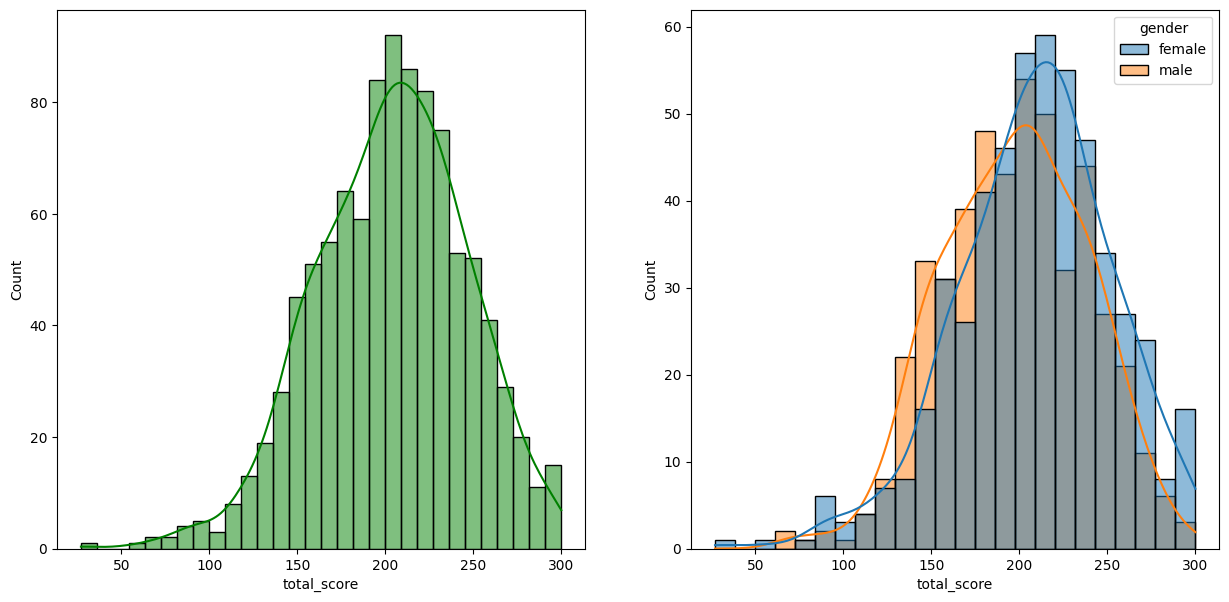

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=data_student,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data_student,x='total_score',kde=True,hue='gender')
plt.show()

Insights
+ Standard lunch helps perform well in exams.
+ Standard lunch helps perform well in exams be it a male or a female.

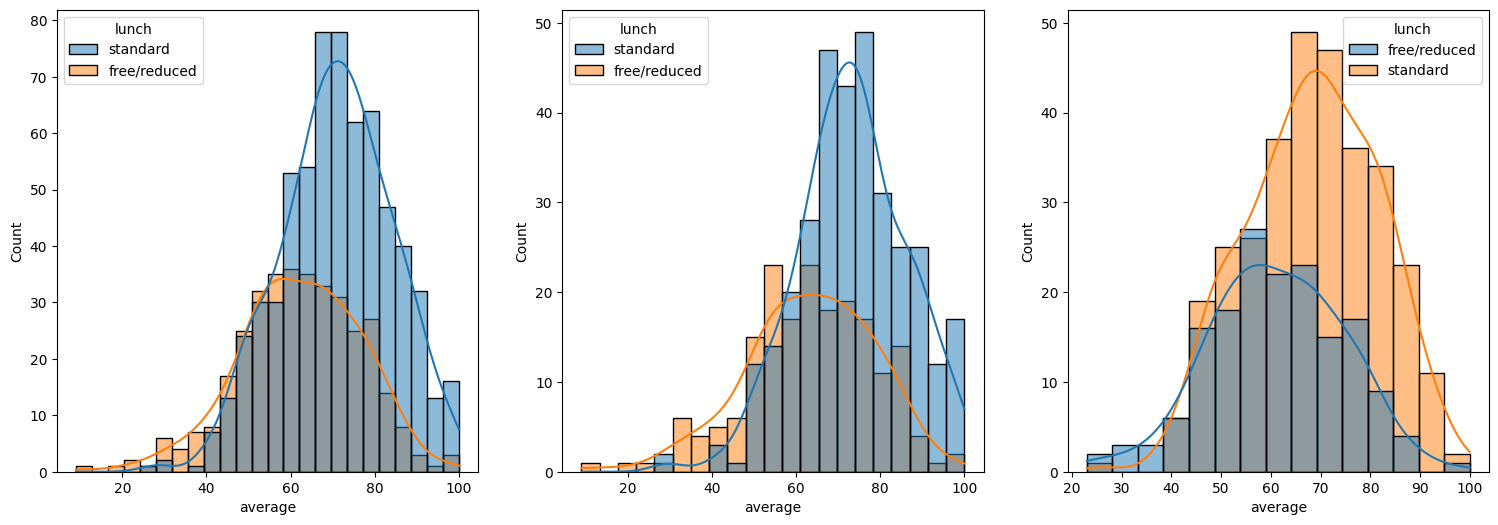

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=data_student,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=data_student[data_student.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=data_student[data_student.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights
+ In general parent's education don't help student perform well in exam.
+ 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
+ 3rd plot we can see there is no effect of parent's education on female students.

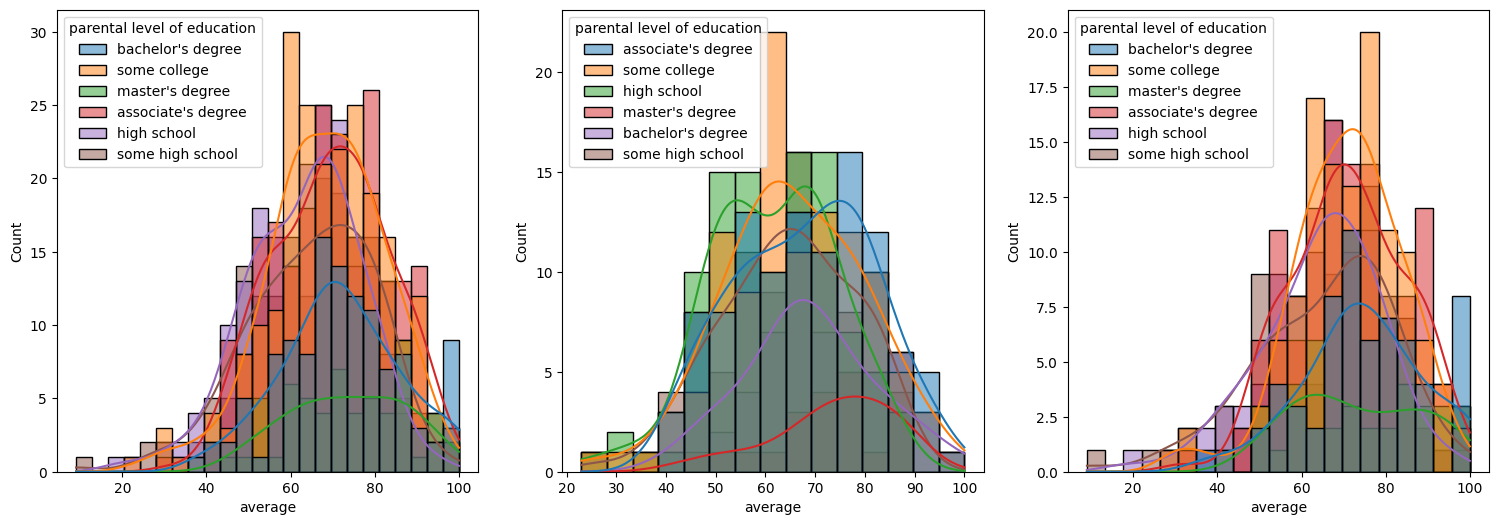

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=data_student,x='average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=data_student[data_student.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=data_student[data_student.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

### 4.2 Maximumum score of students in all three subjects

Insights
+ From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

<Axes: title={'center': 'WRITING Scores'}, ylabel='writing score'>

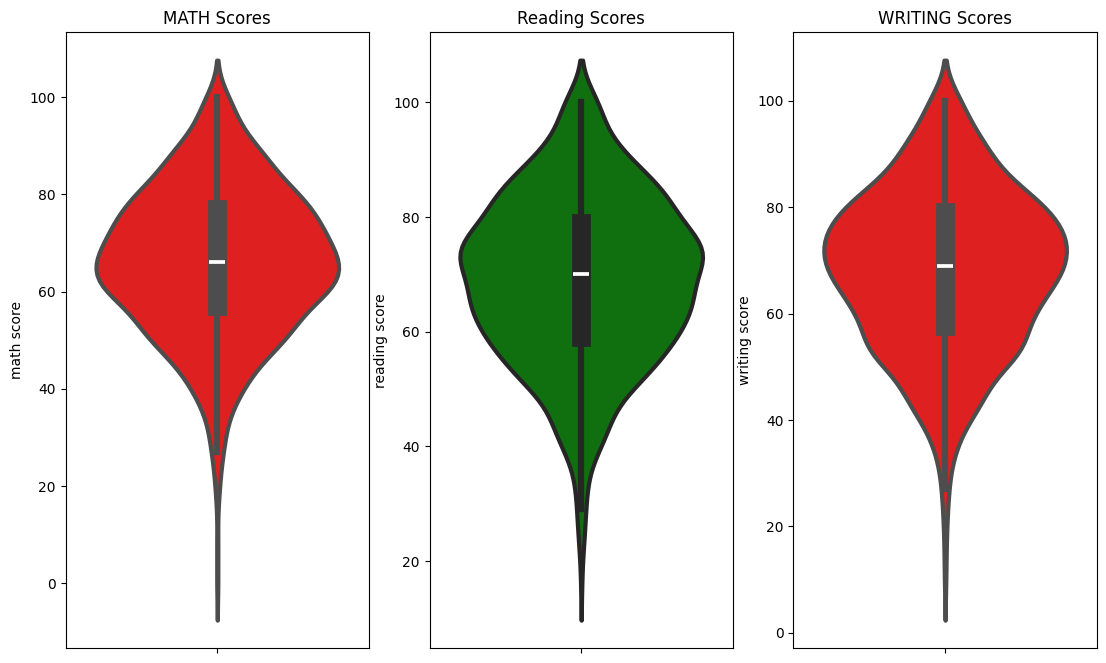

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH Scores')
sns.violinplot(y = 'math score', data = data_student,
               color='red', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Reading Scores')
sns.violinplot(y = 'reading score', data = data_student,
               color='green', linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING Scores')
sns.violinplot(y = 'writing score', data = data_student,
               color='red', linewidth=3)


## 4.3 Feature Wise Visualzation

### 4.3.1 Distribution of Gender
Insights
+ Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

([<matplotlib.patches.Wedge at 0x210b2ba7460>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'Male'),
  Text(0.06782226650507357, -1.1980818587083752, 'Female')],
 [Text(-0.033911133252536856, 0.5990409293541875, '51.8%'),
  Text(0.03956298879462625, -0.698881084246552, '48.2%')])

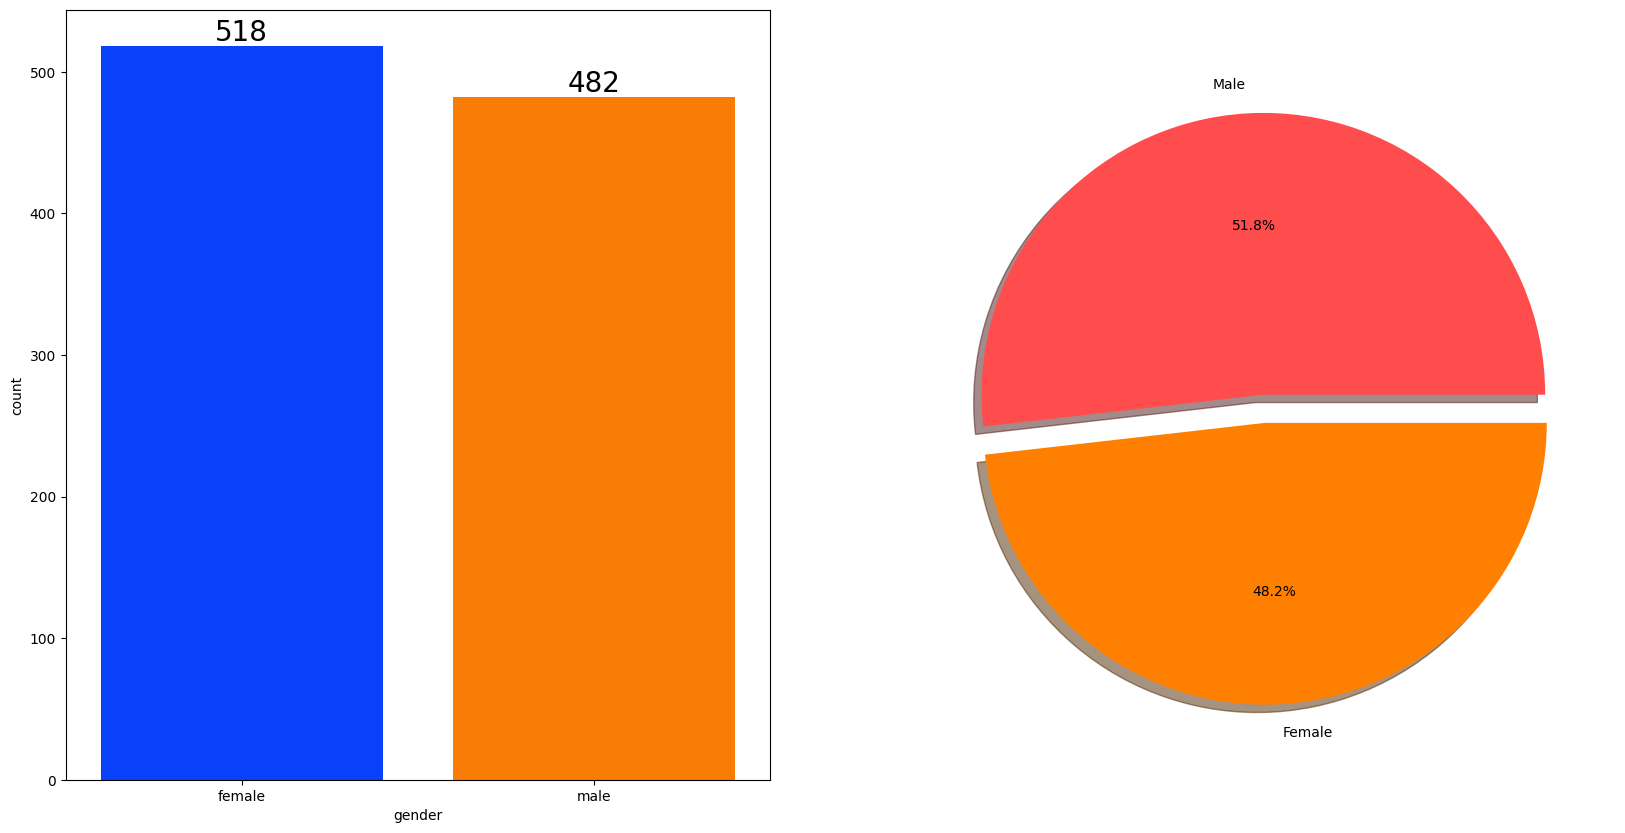

In [22]:
f, ax= plt.subplots(1, 2, figsize= (20, 10))
sns.countplot(x = data_student['gender'], data = data_student,
              palette='bright', ax = ax[0],
              saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)

plt.pie(x = data_student['gender'].value_counts(), labels = ['Male', 'Female'],
        explode = [0, 0.1], autopct='%1.1F%%', shadow= True,
        colors = ['#ff4d4d','#ff8000'])

### 4.3.2 Distribution of Race/Ethnicity
Insights
+ Most of the student belonging from group C /group D.
+ Lowest number of students belong to groupA.

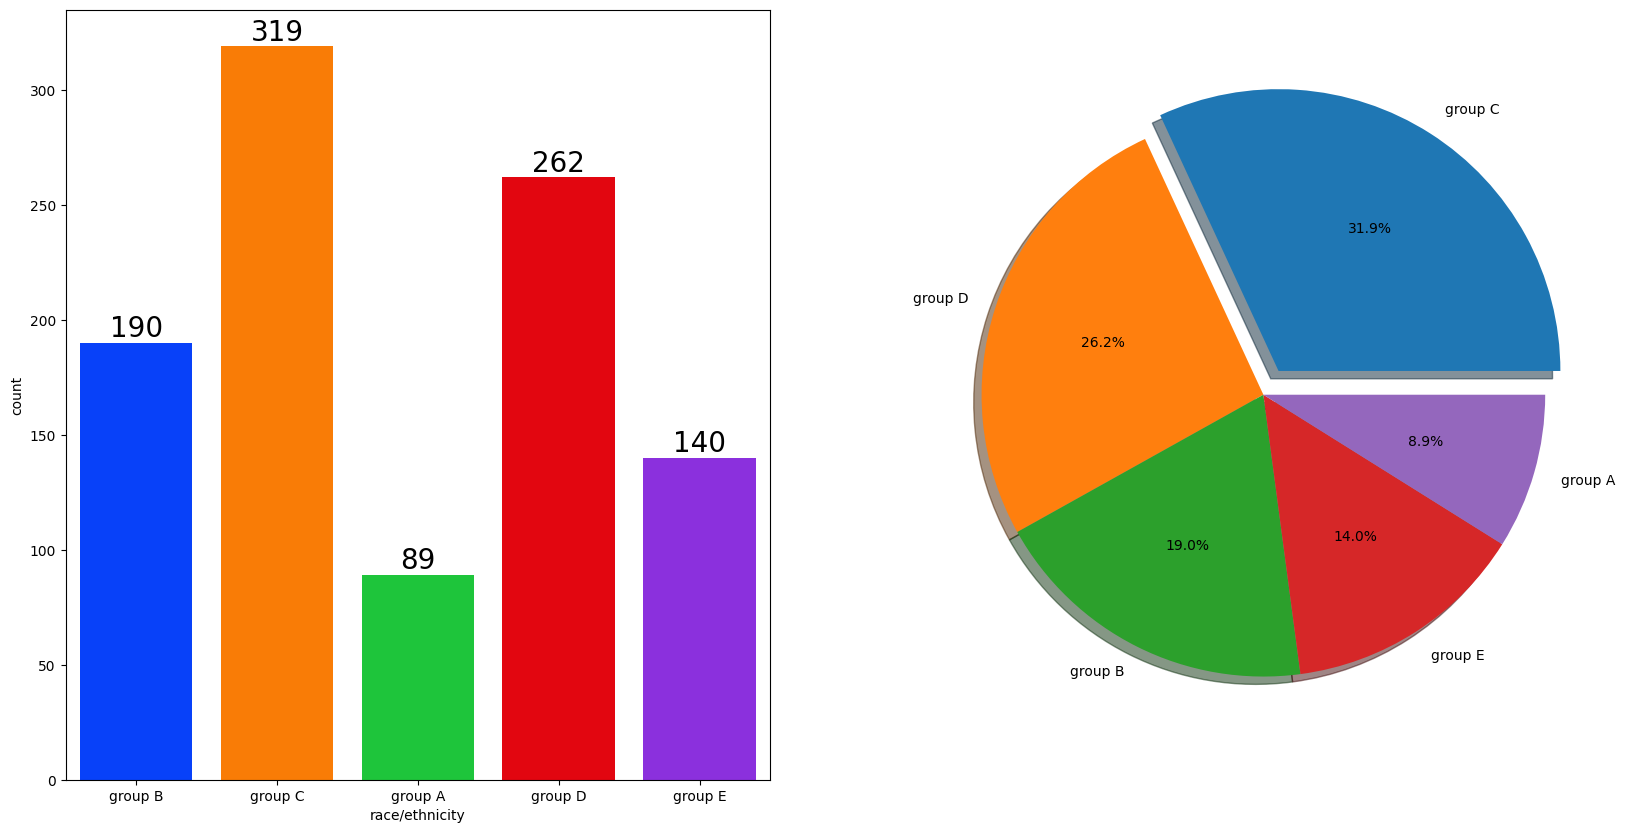

In [23]:
f, ax= plt.subplots(1, 2, figsize= (20, 10))
sns.countplot(x = data_student['race/ethnicity'], data = data_student,
              palette='bright', ax = ax[0],
              saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)

plt.pie(x = data_student['race/ethnicity'].value_counts(), labels=data_student['race/ethnicity'].value_counts().index,
        explode=[0.1,0,0,0,0],autopct='%1.1f%%',
        shadow=True)
plt.show();

### 4.3.3 what is the backgound of parent's education

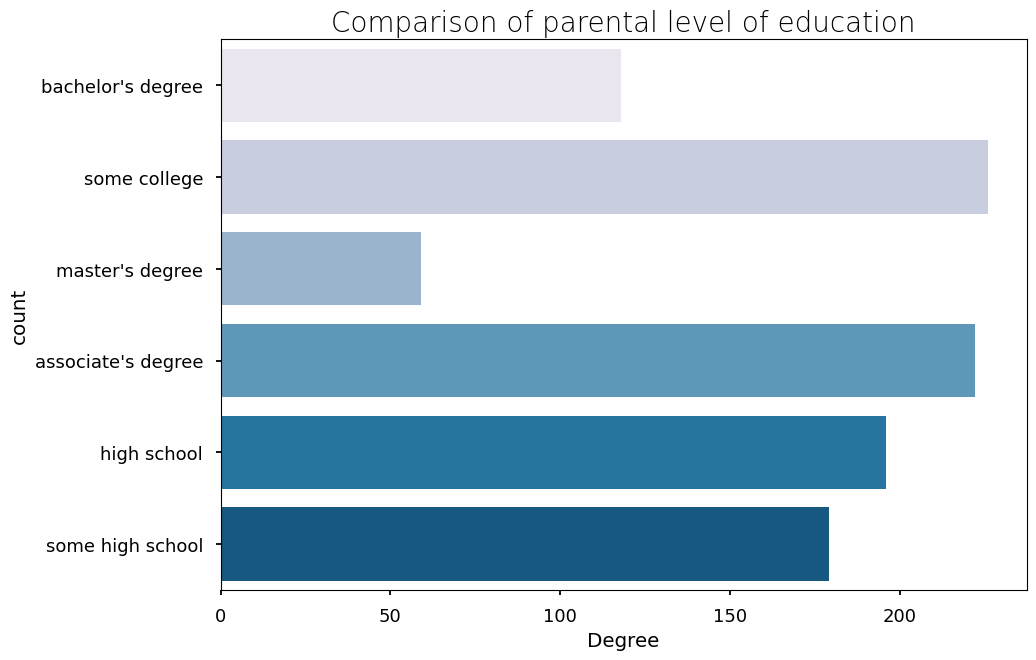

In [24]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(data_student['parental level of education'], palette = 'PuBu')
plt.title('Comparison of parental level of education', fontweight = 30,
          fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show();

### 4.3.4 What type of luch is most common amongst student
Insights
+ Students being served Standard lunch was more than free lunch

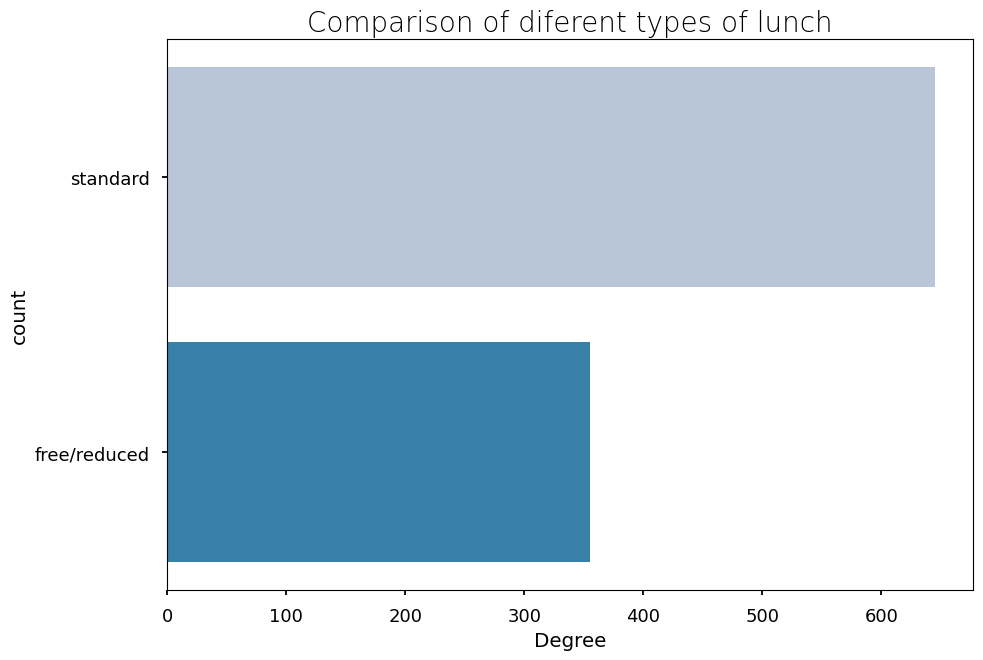

In [25]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(data_student['lunch'], palette = 'PuBu')
plt.title('Comparison of diferent types of lunch', fontweight = 30,
          fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show();

## 4.4 Exploratory Analysis: Bivariate Analysis

### 4.4.1 Does gender have any impact on student performance
Insights
+ On an average females have a better overall score than men.
+ whereas males have scored higher in Maths.

In [33]:
# Create a gender group
gender_group = data_student.groupby('gender')['math score'].mean()
gender_group

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

In [31]:
plt.figure(figsize=(10, 8))
x = ['Total Average', 'Math Average']

female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

male_scores

IndexError: Column(s) average already selected

<Figure size 1000x800 with 0 Axes>

### 4.4.2 Is Race/Ehnicity has any impact on student's performance?
Insights
+ Group E students have scored the highest marks.
+ Group A students have scored the lowest marks.
+ Students from a lower Socioeconomic status have a lower avg in all course subjects

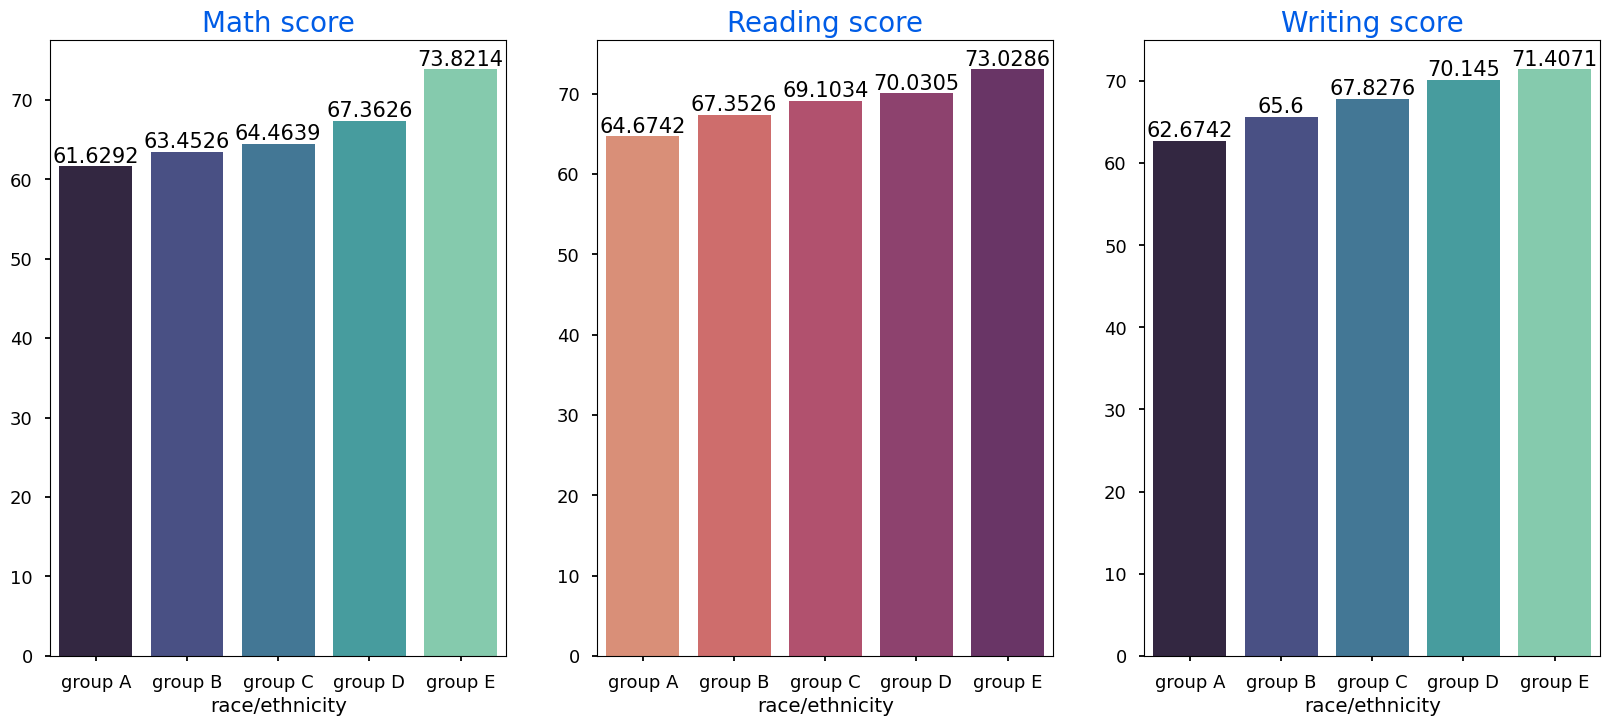

In [28]:
group_race = data_student.groupby('race/ethnicity')
f, ax = plt.subplots(1, 3, figsize = (20, 8))

sns.barplot(x = group_race['math score'].mean().index,
            y = group_race['math score'].mean().values,
            palette = 'mako', ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    
sns.barplot(x = group_race['reading score'].mean().index,
            y = group_race['reading score'].mean().values,
            palette = 'flare', ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)
    


sns.barplot(x = group_race['writing score'].mean().index,
            y = group_race['writing score'].mean().values,
            palette = 'mako', ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### 4.4.3 Does parental education has any impact on student's performance?
Insights
+ The score of student whose parents possess master and bachelor level education are higher than others.


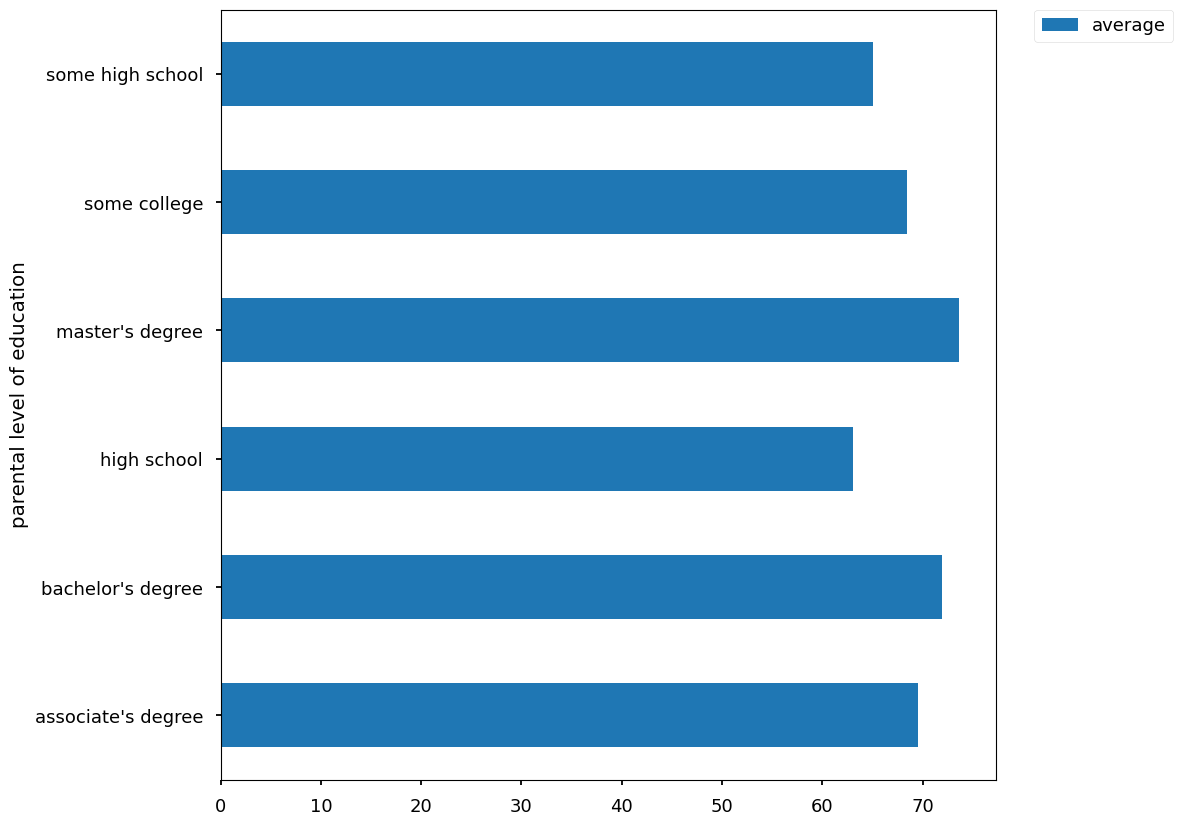

In [35]:
data_student.groupby('parental level of education')['average'].agg('mean').plot(kind = 'barh',
                                                                     figsize=(10,10))
plt.legend(bbox_to_anchor= (1.05, 1), loc = 2, borderaxespad = 0.)

### 4.4.4 Does Lunch type intake has any impact on student's Performance
Insights
+ Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

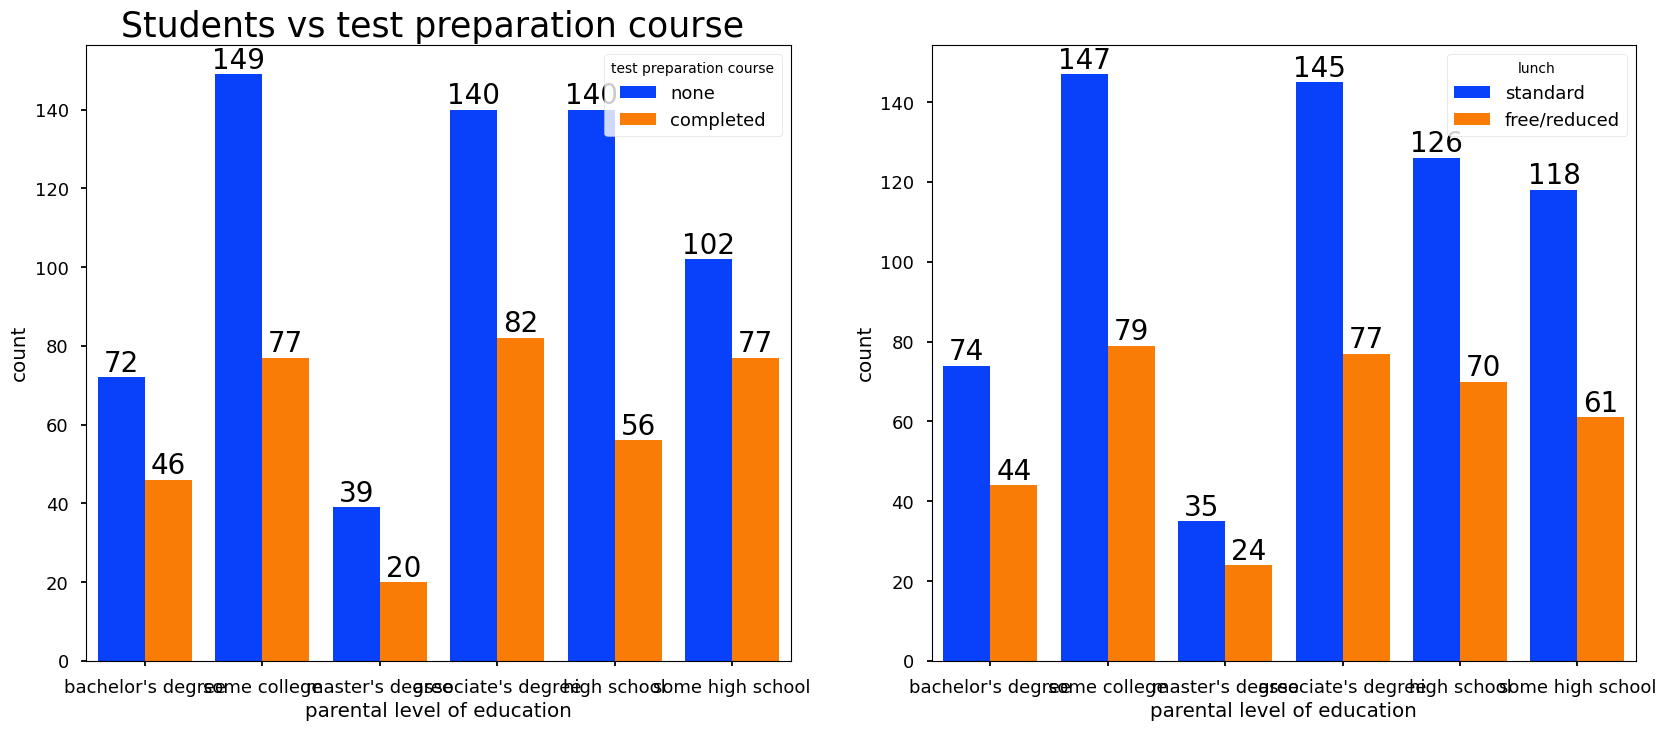

In [36]:
f, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.countplot(x = data_student['parental level of education'],
              data = data_student, palette='bright',
              hue = 'test preparation course', saturation=0.95,
              ax =ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container, color = 'black', size = 20)
    

sns.countplot(x = data_student['parental level of education'],
              data = data_student, palette='bright',
              hue = 'lunch', saturation=0.95,
              ax =ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, color = 'black', size = 20)

### 4.4.5 Does Test prepration course has any impact on student's performance ?
Insights
+ Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

<Axes: xlabel='lunch', ylabel='writing score'>

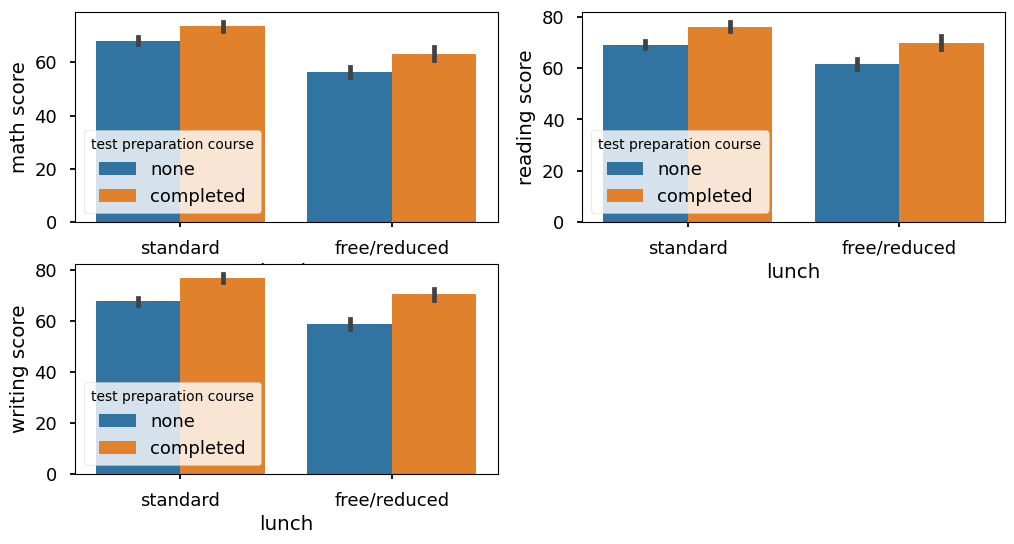

In [37]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=data_student['lunch'], y=data_student['math score'],
             hue = data_student['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=data_student['lunch'], y=data_student['reading score'], 
             hue=data_student['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=data_student['lunch'], y=data_student['writing score'], 
             hue=data_student['test preparation course'])

In [1]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(data_student['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(data_student['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data_student['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(data_student['average'],color='lightgreen')
plt.suptitle("Box plot showing score distribution and outliers")
plt.show()

NameError: name 'plt' is not defined

In [21]:
#data frame 
data_student.to_csv('stud_data.csv')